## Import of the libraries

In [38]:
import os
import requests
import zipfile
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Download of the dataset

In [ ]:
url = "https://www.kaggle.com/api/v1/datasets/download/mexwell/amazon-reviews-multi"
output_file = "data/amazon_reviews-multi.zip"

if not os.path.exists("data"):
    print("Creating data directory")
    os.makedirs("data")
    print("Downloading Amazon reviews dataset")
    response = requests.get(url, stream=True)
    with open(output_file, "wb") as f_out:
        total_size = int(response.headers.get("content-length", 0))
        progress_bar = tqdm.tqdm(total=total_size, unit="B", unit_scale=True)
        for data in response.iter_content(chunk_size=8192):
            if not data:
                break
            f_out.write(data)
            progress_bar.update(len(data))
    print("Extracting files")
    with zipfile.ZipFile(output_file, "r") as zip_ref:
        zip_ref.extractall("data")
    print("Dataset downloaded and extracted")
    os.remove(output_file)
    print("Zip file deleted")
else:
    print("Data directory already exists")

Creating data directory


100%|█████████▉| 138M/138M [00:37<00:00, 3.63MB/s] 

Download complete. Extracting files
Dataset downloaded and extracted
Zip file deleted


100%|██████████| 138M/138M [00:50<00:00, 3.63MB/s]

# Data preprocessing and exploration

In [3]:
train_df, test_df, validation_df = pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv'), pd.read_csv('data/validation.csv')

In [4]:
train_df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [5]:
train_df = train_df[train_df['language'].isin(['de', 'en', 'es'])]
test_df = test_df[test_df['language'].isin(['de', 'en', 'es'])]
validation_df = validation_df[validation_df['language'].isin(['de', 'en', 'es'])]

In [6]:
train_df.drop(columns=['Unnamed: 0', 'review_id', 'product_id', 'reviewer_id'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'review_id', 'product_id', 'reviewer_id'], inplace=True)
validation_df.drop(columns=['Unnamed: 0', 'review_id', 'product_id', 'reviewer_id'], inplace=True)

In [7]:
train_df.head()

,stars,review_body,review_title,language,product_category
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [8]:
train_df = train_df[train_df['stars'] != 3]
test_df = test_df[test_df['stars'] != 3]
validation_df = validation_df[validation_df['stars'] != 3]

train_df['label'] = train_df['stars'].apply(lambda x: True if x > 3 else False)
test_df['label'] = test_df['stars'].apply(lambda x: True if x > 3 else False)
validation_df['label'] = validation_df['stars'].apply(lambda x: True if x > 3 else False)

train_df.drop(columns=['stars'], inplace=True)
test_df.drop(columns=['stars'], inplace=True)
validation_df.drop(columns=['stars'], inplace=True)

In [9]:
train_df.head()

,review_body,review_title,language,product_category,label
0,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,False
1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,False
2,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,False
3,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,False
4,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,False


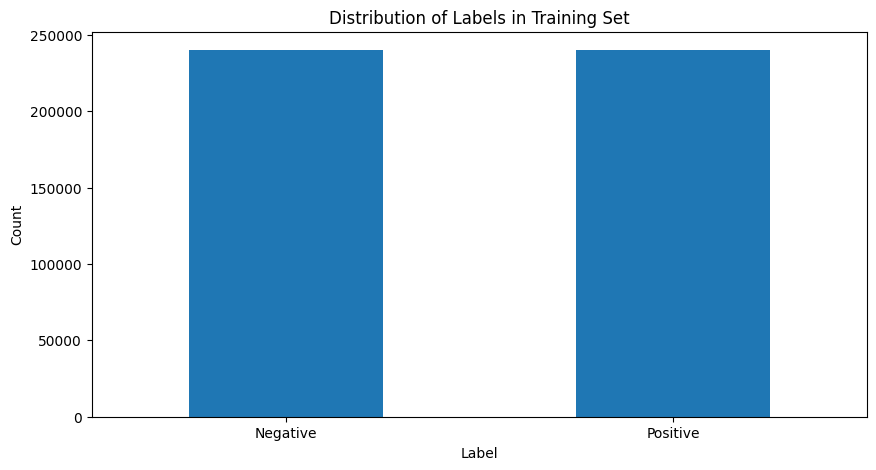

In [10]:
plt.figure(figsize=(10, 5))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

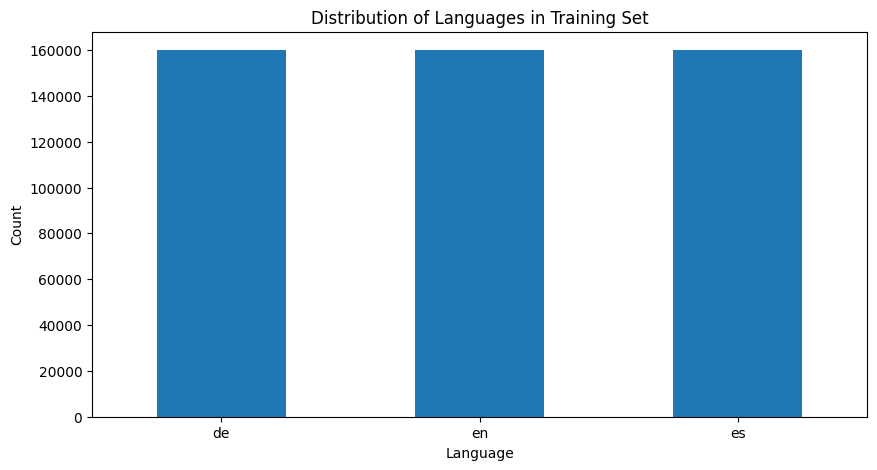

In [11]:
plt.figure(figsize=(10, 5))
train_df['language'].value_counts().plot(kind='bar')
plt.title('Distribution of Languages in Training Set')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
def plot_language_distribution(df, language):
    plt.figure(figsize=(10, 5))
    df[df['language'] == language]['label'].value_counts().plot(kind='bar')
    plt.title(f'Distribution of Labels in {language} Language')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
    plt.show()

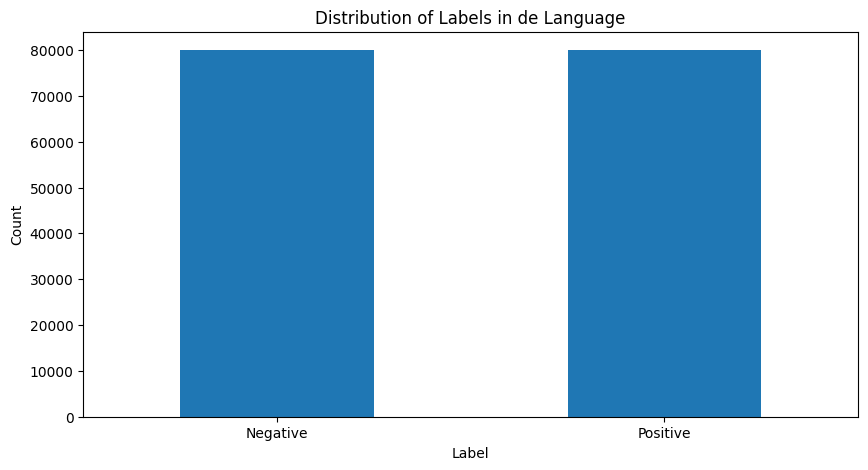

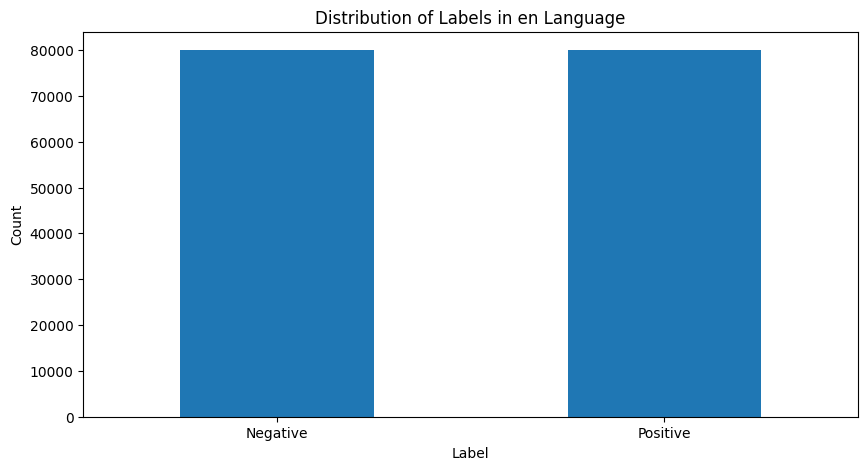

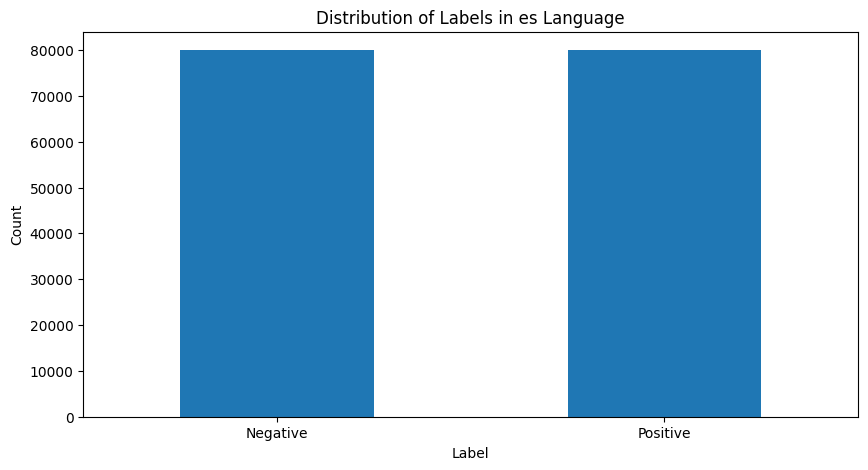

In [13]:
for lang in ['de', 'en', 'es']:
    plot_language_distribution(train_df, lang)

In [14]:
def plot_category_distribution(df):
    plt.figure(figsize=(10, 5))
    df['product_category'].value_counts().plot(kind='bar')
    plt.title('Distribution of Reviews per Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

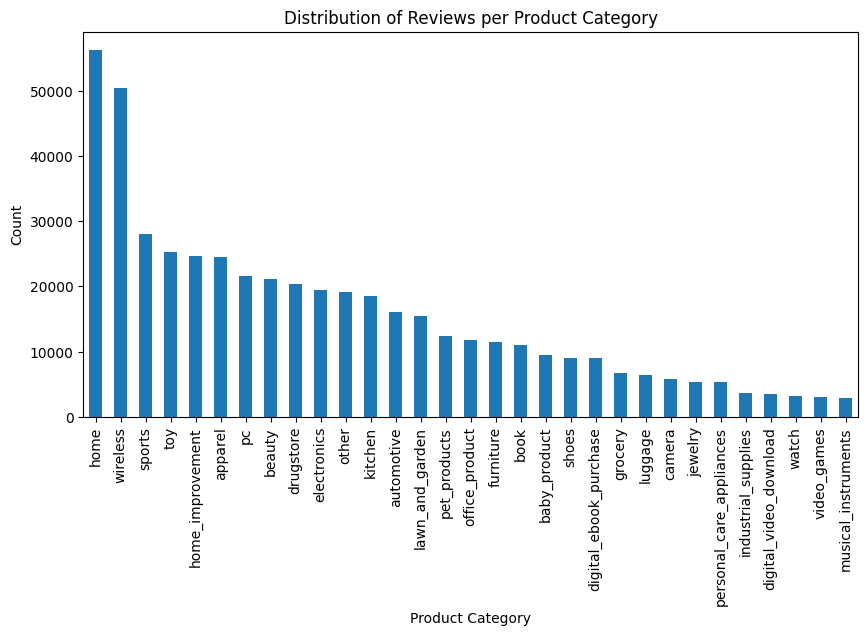

In [15]:
plot_category_distribution(train_df)

In [21]:
def plot_sentiment_distribution_per_category(en_train_df, es_train_df, de_train_df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    en_train_df.groupby(['product_category', 'label']).size().unstack().plot(
        kind='bar', stacked=True, alpha=0.7, ax=axes[0]
    )
    axes[0].set_title('English Reviews')
    axes[0].set_xlabel('Product Category')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)
    
    es_train_df.groupby(['product_category', 'label']).size().unstack().plot(
        kind='bar', stacked=True, alpha=0.7, ax=axes[1]
    )
    axes[1].set_title('Spanish Reviews')
    axes[1].set_xlabel('Product Category')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=90)

    de_train_df.groupby(['product_category', 'label']).size().unstack().plot(
        kind='bar', stacked=True, alpha=0.7, ax=axes[2]
    )
    axes[2].set_title('German Reviews')
    axes[2].set_xlabel('Product Category')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=90)
    
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, ['Negative', 'Positive'], loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2)
    
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    
    fig.suptitle('Sentiment Distribution per Product Category by Language', fontsize=16)
    
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.show()

In [30]:
en_train_df = train_df[train_df['language'] == 'en']
es_train_df = train_df[train_df['language'] == 'es']
de_train_df = train_df[train_df['language'] == 'de']

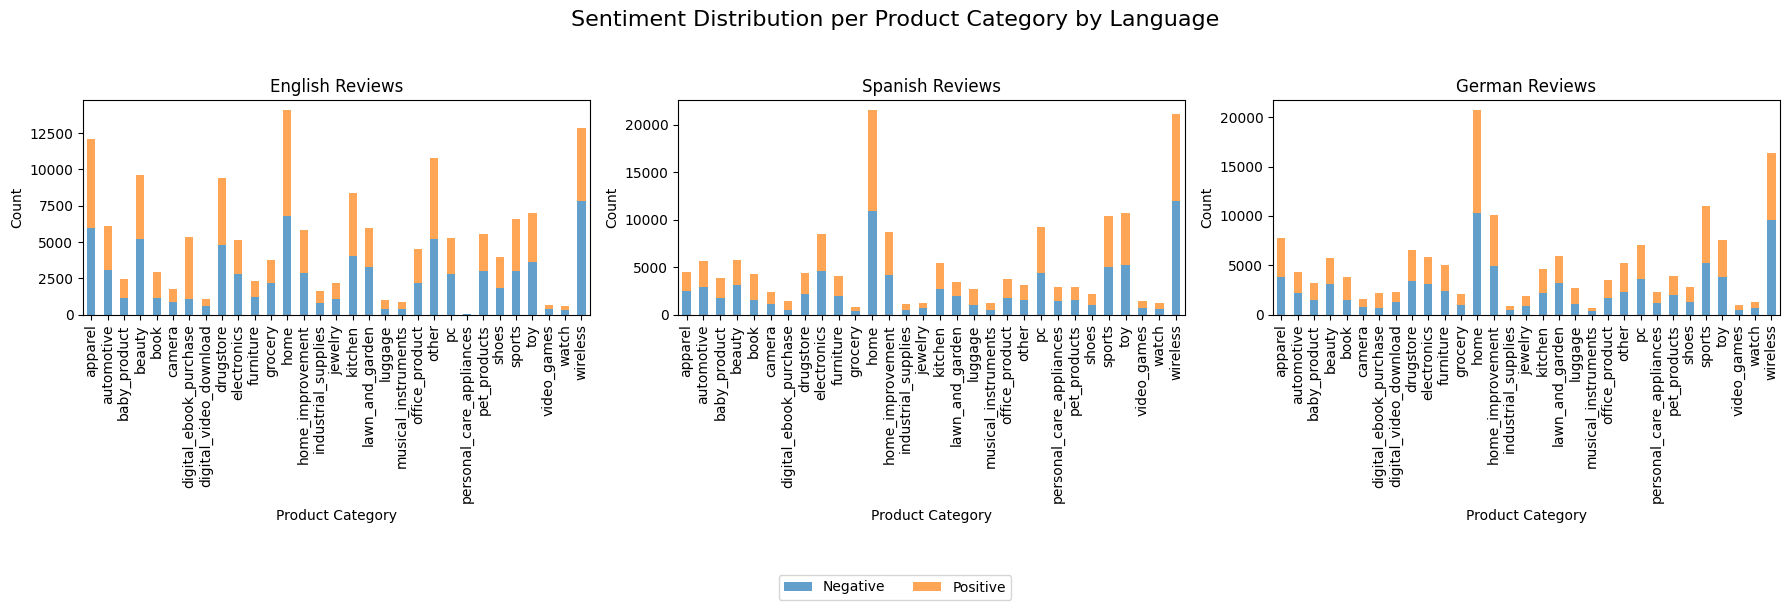

In [31]:
plot_sentiment_distribution_per_category(en_train_df, es_train_df, de_train_df)

In [33]:
def plot_review_length_distribution_all_languages(df):
    df_copy = df.copy()

    if 'review_length' not in df_copy.columns:
        df_copy['review_length'] = df_copy['review_body'].str.split().str.len()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    languages = ['en', 'es', 'de']
    language_names = ['English', 'Spanish', 'German']
    
    for i, (lang, name) in enumerate(zip(languages, language_names)):
        df_copy[df_copy['language'] == lang]['review_length'].hist(bins=50, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Review Lengths in {name}')
        axes[i].set_xlabel('Number of Words')
        axes[i].set_ylabel('Count')
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
    fig.suptitle('Distribution of Review Lengths by Language', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

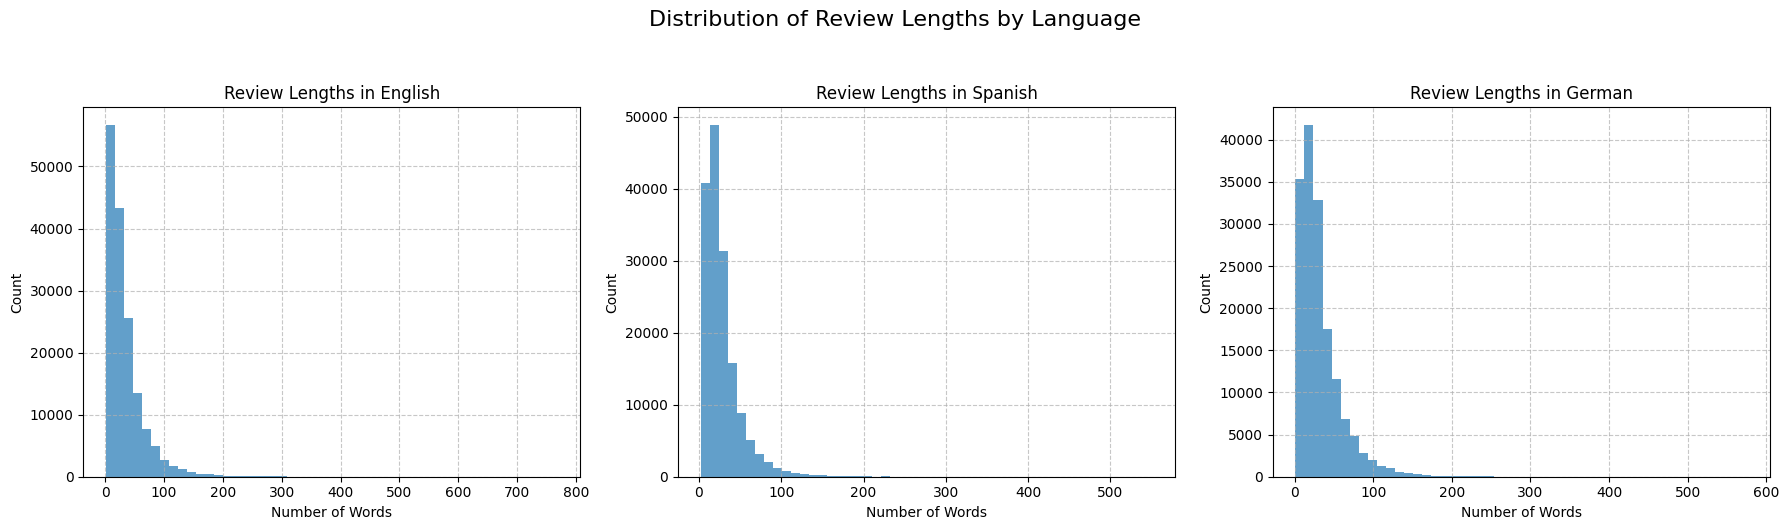

In [34]:
plot_review_length_distribution_all_languages(train_df)

In [35]:
def plot_review_length_sentiment_correlation_all_languages(df):
    df_copy = df.copy()
    if 'review_length' not in df_copy.columns:
        df_copy['review_length'] = df_copy['review_body'].str.split().str.len()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    languages = ['en', 'es', 'de']
    language_names = ['English', 'Spanish', 'German']
    
    for i, (lang, name) in enumerate(zip(languages, language_names)):
        df_copy[df_copy['language'] == lang].groupby('label')['review_length'].mean().plot(
            kind='bar', ax=axes[i], color=['#ff9999', '#66b3ff']
        )
        axes[i].set_title(f'Average Review Length in {name}')
        axes[i].set_xlabel('Sentiment')
        axes[i].set_ylabel('Average Number of Words')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Negative', 'Positive'], rotation=0)
        axes[i].grid(True, linestyle='--', alpha=0.7, axis='y')
    
    fig.suptitle('Average Review Length by Sentiment Across Languages', fontsize=16, y=1.05)
    
    plt.tight_layout()
    plt.show()

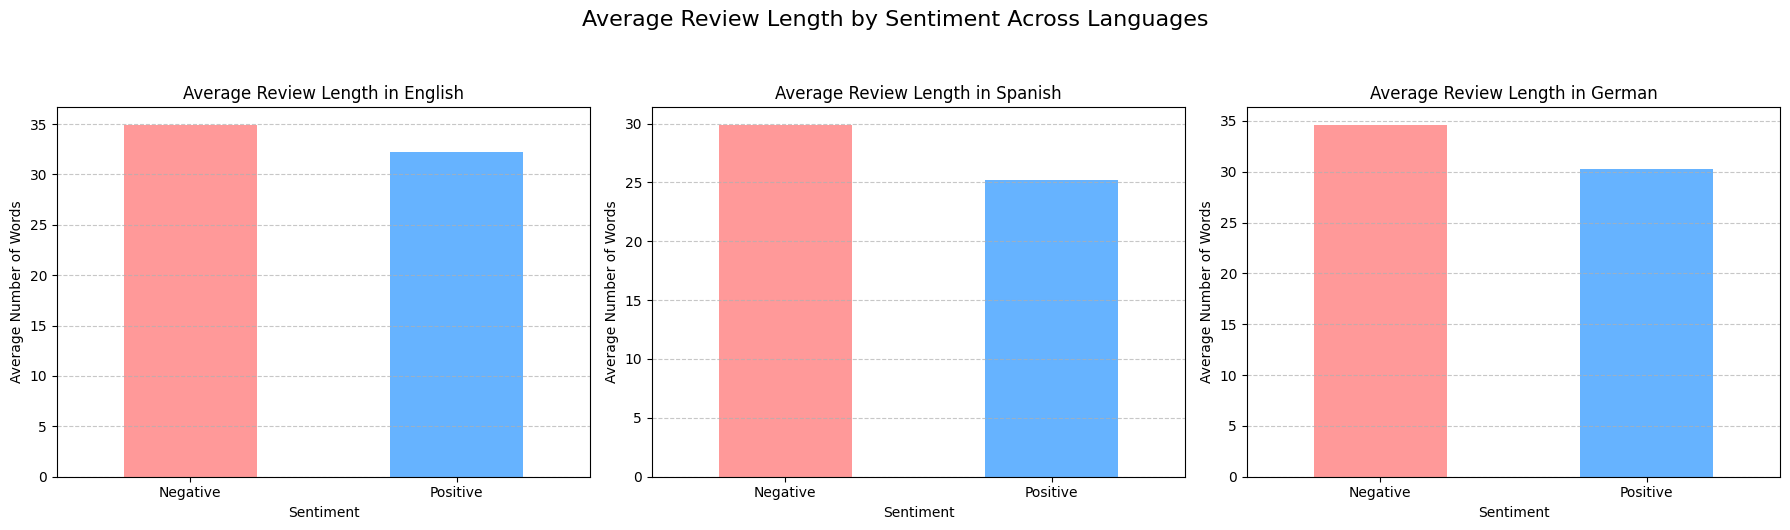

In [36]:
plot_review_length_sentiment_correlation_all_languages(train_df)

In [42]:
def plot_most_common_words_all_languages(df, en_stop_words, es_stop_words, de_stop_words):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    languages = ['en', 'es', 'de']
    language_names = ['English', 'Spanish', 'German']
    stop_words_list = [en_stop_words, es_stop_words, de_stop_words]
    
    for i, (lang, name, stop_words) in enumerate(zip(languages, language_names, stop_words_list)):
        words = ' '.join(df[df['language'] == lang]['review_body'].tolist())
        words = word_tokenize(words)
        words = [word for word in words if word.lower() not in stop_words]
        word_counts = pd.Series(words).value_counts().head(20)
        
        word_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Most Common Words in {name}')
        axes[i].set_xlabel('Words')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)
    
    fig.suptitle('Most Common Words Across Languages (No Stop Words)', fontsize=16, y=1.05)
    
    plt.tight_layout()
    plt.show()

In [43]:
en_stop_words = set(stopwords.words('english'))
en_stop_words.update(['.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', "'", '"', '’', "n't", "'s"])
es_stop_words = set(stopwords.words('spanish'))
es_stop_words.update(['.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', "'", '"', "..."])
de_stop_words = set(stopwords.words('german'))
de_stop_words.update(['.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', "'", '"', "..."])

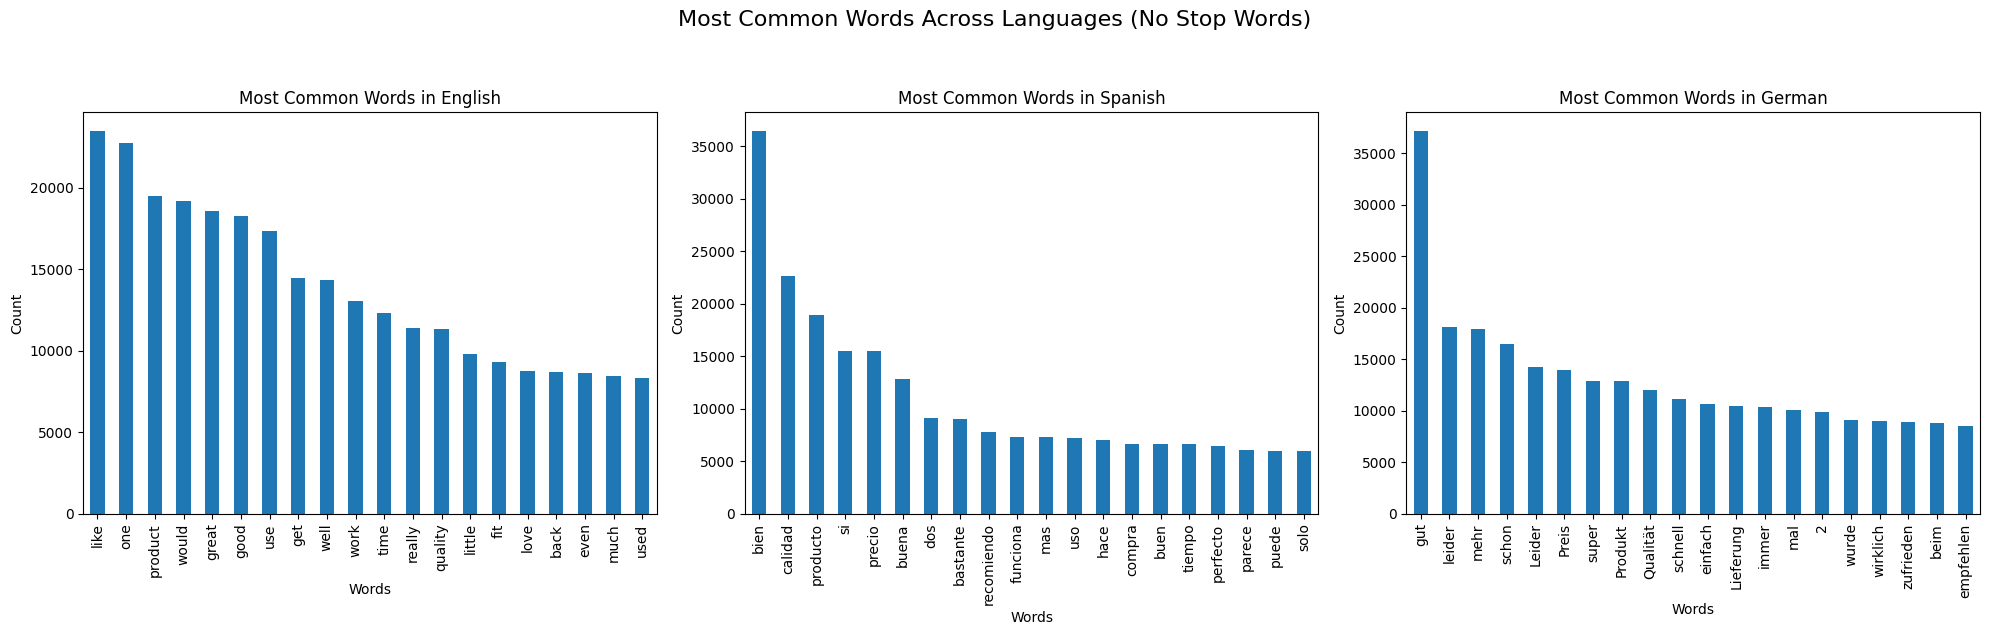

In [44]:
plot_most_common_words_all_languages(train_df, en_stop_words, es_stop_words, de_stop_words)